In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, 'C:/Users/grzesiek/Documents/Data Science/PycharmProjects/ML_from_scratch')
%matplotlib notebook
cmap = plt.get_cmap('viridis')

In [2]:
cd ..

/home/grzegorz/Projects/ML_from_scratch


In [4]:
from linear_regression import LinearRegression
from general_linear_regression import GeneralLinearRegression

In [5]:
help(GeneralLinearRegression)

Help on class GeneralLinearRegression in module general_linear_regression:

class GeneralLinearRegression(builtins.object)
 |  This class represents a general (= multivariate, i.e. multiple input features and multiple output values)
 |  linear regression model which uses gradient descent for training.
 |  
 |  Attributes:
 |      lr: A float representing the learning rate for gradient descent.
 |      n_iters: An integer for the number of iterations for the gradient descent loop.
 |      weights: A numpy array of feature weights (will be initialized in the fit method).
 |      bias: A numpy array for the bias terms (will be initialized in the fit method).
 |      regressors: A list of regressors for each output coordinate
 |      n_coordinates: Number of output coordinates
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lr:float=0.001, n_iters:int=1000)
 |      The constructor for GeneralLinearRegression class.
 |      
 |      Parameters:
 |          lr: The learning rate for g

In [6]:
dir(GeneralLinearRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'fit',
 'predict']

# 1d input 2d output example

<IPython.core.display.Javascript object>


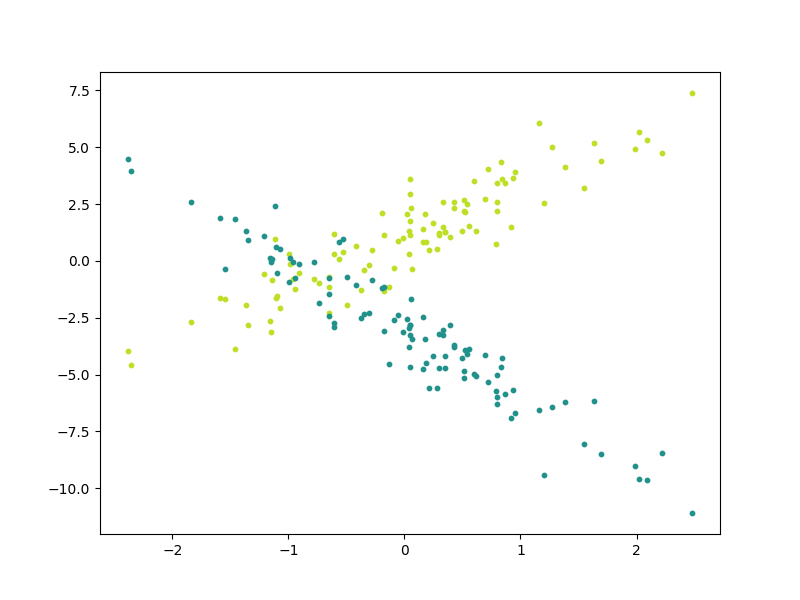

In [6]:
X, _ = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
y1 = 2 * X + 1 + np.random.normal(0, 1, (100, 1))
y2 = -3 * X -3 + np.random.normal(0, 1, (100, 1))

fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X, y1, color=cmap(0.9), s=10) 
m2 = plt.scatter(X, y2, color=cmap(0.5), s=10) 
plt.show()
Y = np.array([(i[0], j[0]) for i, j in zip(y1, y2)])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [19]:
Y_train

array([[-1.53138438,  4.91636348],
       [-2.5734712 ,  1.86103456],
       [ 1.30050081,  0.85548788],
       [ 2.8313304 ,  4.33937197],
       [ 2.53654044,  8.09090125],
       [ 1.86978844,  3.13969699],
       [ 6.06159265,  8.62146016],
       [ 5.31094401,  3.15836186],
       [ 0.29203053,  5.82548664],
       [-4.01985813,  2.74364329],
       [ 2.25054788,  3.78819138],
       [-3.20665617, -0.22501529],
       [ 4.34492952,  4.18400158],
       [-1.41833979, -2.1232337 ],
       [ 6.66177606,  2.04064159],
       [ 0.1914783 ,  3.36920337],
       [ 4.96407782,  5.12203425],
       [ 3.34741694,  4.48272105],
       [ 4.4737377 ,  2.70735501],
       [-3.35347317,  1.53692871],
       [-4.18238583,  6.09416389],
       [ 1.42238279,  5.81840379],
       [-4.91558144,  6.23036458],
       [-0.12620976,  3.37990878],
       [ 4.9215994 ,  6.21289104],
       [ 1.74890589,  1.58939588],
       [ 0.80550032,  0.35211068],
       [ 8.20550871,  8.39841361],
       [ 3.86576532,

In [7]:
regressor = GeneralLinearRegression(lr=0.01)
regressor.fit(X_train, Y_train)

regressor.n_coordinates, regressor.regressors[0], regressor.regressors[1]

(2,
 <linear_regression.LinearRegression at 0x7f56a0895b38>)

In [14]:
predicted = regressor.predict(X_test)
predicted

array([[ 3.75878029, -6.47011675],
       [ 3.01457158, -5.49573156],
       [-0.30628884, -1.14776141],
       [-1.40797976,  0.29467175],
       [ 1.68873205, -3.75982279],
       [-1.15149799, -0.04113732],
       [ 0.61541216, -2.35453553],
       [ 5.60244851, -8.88401357],
       [ 1.48149198, -3.48848539],
       [-2.00090856,  1.07098765],
       [ 1.52793701, -3.54929541],
       [ 2.30745244, -4.56990737],
       [ 1.84633886, -3.96617586],
       [ 2.20316467, -4.43336441],
       [ 2.18107955, -4.40444857],
       [-0.05668702, -1.47456264],
       [-1.42699654,  0.31957024],
       [ 1.84936424, -3.97013695],
       [ 2.20348137, -4.43377906],
       [ 1.94364142, -4.09357315]])

In [13]:
mean_squared_error(Y_test, predicted)

1.1002037512041871

<IPython.core.display.Javascript object>


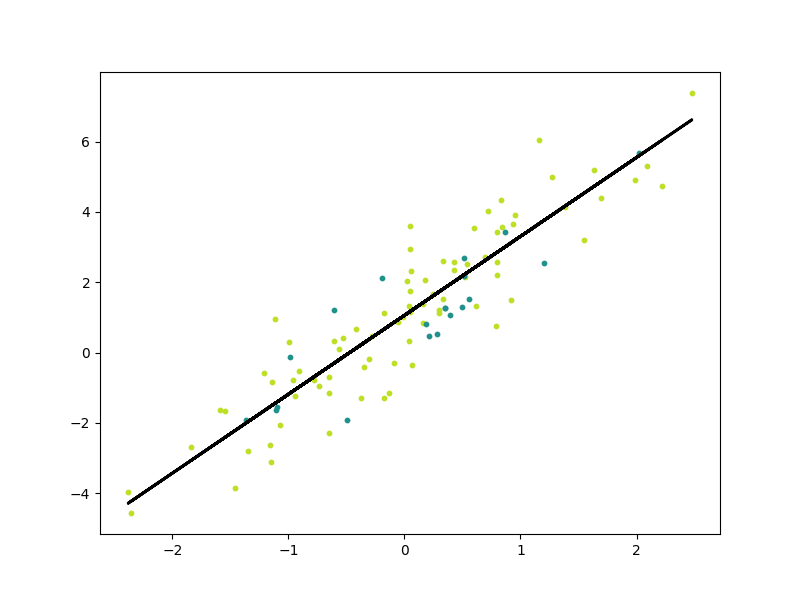

<IPython.core.display.Javascript object>


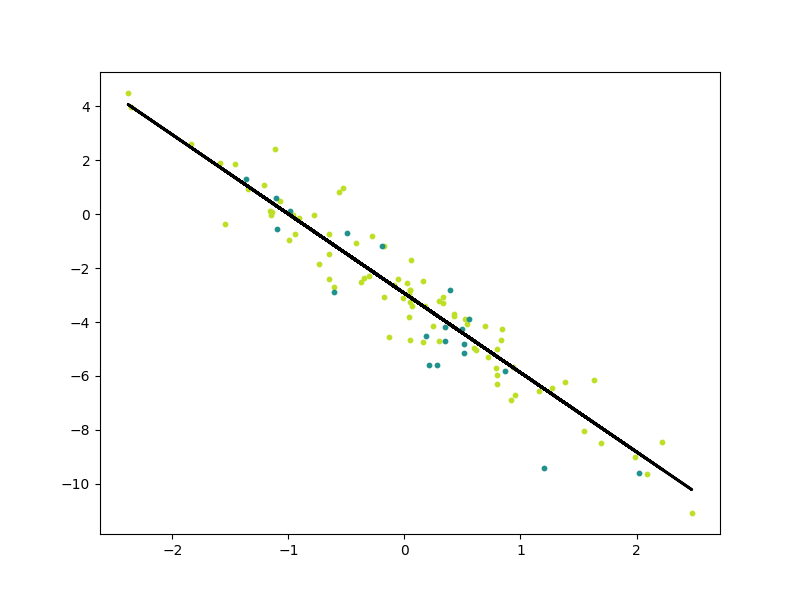

In [17]:
y_pred_lines = regressor.predict(X)

fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, Y_train[:, 0], color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, Y_test[:, 0], color=cmap(0.5), s=10)
plt.plot(X, y_pred_lines[:, 0], color='k', linewidth=2, label="prediction")
plt.show()

fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, Y_train[:, 1], color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, Y_test[:, 1], color=cmap(0.5), s=10)
plt.plot(X, y_pred_lines[:, 1], color='k', linewidth=2, label="prediction")
plt.show()

# 2D input 2D output example

In [10]:
X, _ = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)
y1 = 2 * X[:, 0] + 3* X[:, 1] + 1 + np.random.normal(0, 1, 100)
y2 = -1 * X[:, 0] + 2* X[:, 1] + 4 + np.random.normal(0, 1, 100)
y1[0], y2[0]

(-4.911497484380866, -0.05970687906917638)

In [20]:
Y = np.array([(i, j) for i, j in zip(y1, y2)])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [22]:
regressor = GeneralLinearRegression(lr=0.01)
regressor.fit(X_train, Y_train)

regressor.n_coordinates, regressor.regressors[0], regressor.regressors[1]

(2,
 <linear_regression.LinearRegression at 0x7fb2cff56898>)

In [23]:
predicted = regressor.predict(X_test)
predicted

array([[ 3.41754732,  6.43436296],
       [-3.13975432,  4.9352722 ],
       [ 4.61517531,  4.40484796],
       [-3.14128881,  1.95833672],
       [ 0.225552  ,  5.87572148],
       [ 3.48584379,  5.63443034],
       [ 8.60622417,  3.64257706],
       [ 3.06692381,  4.1308842 ],
       [-0.84500692,  2.47081339],
       [ 1.73772574,  5.69760665],
       [ 4.89209626,  7.58075295],
       [ 6.88765591,  1.95339811],
       [ 0.92870827,  5.75656682],
       [ 8.59934177,  5.42869344],
       [ 4.41043407,  1.20209391],
       [-1.63006101,  1.38661332],
       [ 3.53091859,  1.84753588],
       [-1.98759874,  2.5530521 ],
       [ 0.68463471,  3.4012054 ],
       [-2.70210239,  0.64962769]])

In [24]:
mean_squared_error(Y_test, predicted)

0.7584636573344472

In [25]:
weights = regressor.weights
bias = regressor.bias

In [28]:
y_pred_planes = regressor.predict(X)
corr = 0

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
m1 = ax.scatter(X_train[:, 0], X_train[:, 1], Y_train[:, corr], color=cmap(0.9))
m2 = ax.scatter(X_test[:, 0], X_test[:, 1], Y_test[: corr], color=cmap(0.5))
Xnew, Ynew = np.meshgrid(X[:, 0], X[:, 1])


Znew = weights[0, corr]*Xnew + weights[1, corr]*Ynew + bias[corr]
ax.scatter(X[:, 0], X[:, 1], y_pred_planes[:, corr], color='red')
ax.plot_surface(Xnew, Ynew, Znew, linewidth=0, color='grey', alpha=0.05)
plt.show()

<IPython.core.display.Javascript object>

ValueError: shape mismatch: objects cannot be broadcast to a single shape